In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from my_equations import get_stationary

In [3]:
I_0 = 300.0

tmax = 300

zmax=15
dz=0.1
z_grid = np.arange(0,zmax,dz) # make sure get_stationary has dz=0.1
Nz=len(z_grid)

dmax = 10
dmin = 0.1
dstep = 0.5
drange=dmax-dmin
d_vals=np.arange(dmin,dmax,dstep)
Nd = len(d_vals)

# Function starts here

In [30]:
d_vals.shape

(20,)

In [31]:
stationary_A = np.zeros((Nz,Nd)) 
stationary_Rb = np.zeros((Nz,Nd))
stationary_Rd = np.zeros((Nz,Nd))
stationary_Rs = np.zeros(Nd)

In [32]:
# https://github.com/kuk/log-progress/blob/master/README.md progress bar
i=0
import progress_bar
for d in progress_bar.log_progress(d_vals, every=1):
    print(d)
    stationary_A[:,i], stationary_Rb[:,i], stationary_Rd[:,i], stationary_Rs[i] = get_stationary(zmax=zmax,tmax=tmax, d=d, I0=I_0, dz=dz)
    i += 1

0.1
0.6
1.1
1.6
2.1
2.6
3.1
3.6
4.1
4.6
5.1
5.6
6.1
6.6
7.1
7.6
8.1
8.6
9.1
9.6


<IPython.core.display.Javascript object>


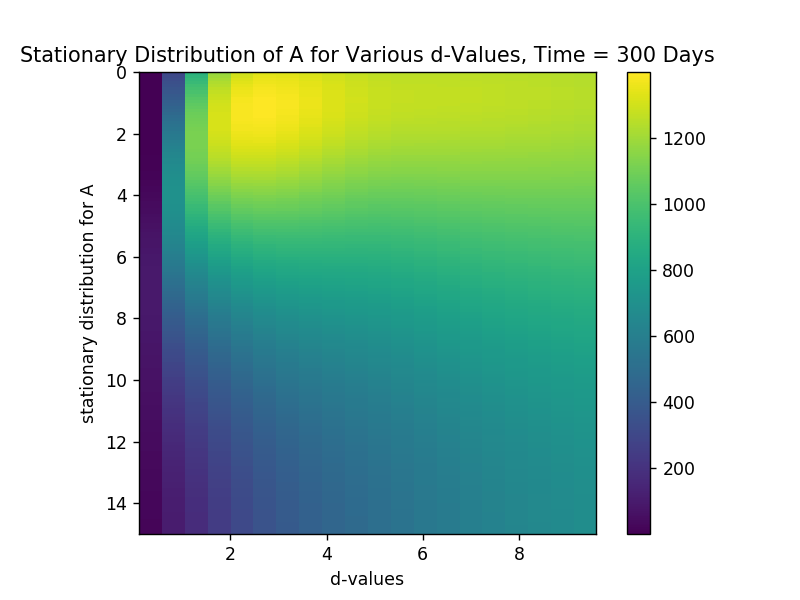

In [65]:
# Heatmap
plt.imshow(stationary_A[:,:],aspect=d/zmax,origin="lower",extent=(dmin,d,0,zmax))
plt.xlabel('d-values')
plt.ylabel('stationary distribution for A')
plt.title('Stationary Distribution of A for Various d-Values, Time = {} Days'.format(tmax))
plt.gca().invert_yaxis()
plt.colorbar()

<IPython.core.display.Javascript object>


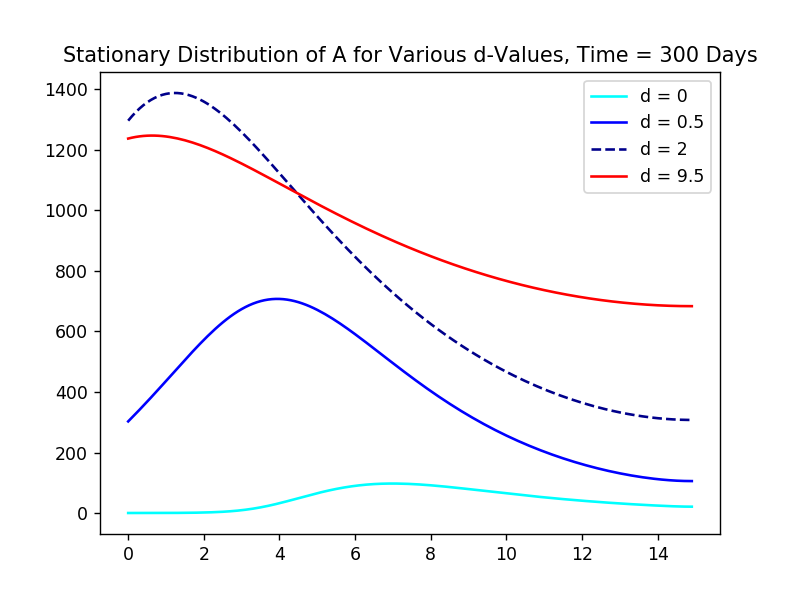

C:\Users\aliso\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  if __name__ == '__main__':


Text(0.5, 1.0, 'Stationary Distribution of A for Various d-Values, Time = 300 Days')

In [53]:
first = 0
second =0.5
third = 2
fourth = 9.5
plt.plot(z_grid,stationary_A[:,int(first/dstep)],color='aqua')
plt.plot(z_grid,stationary_A[:,int(second/dstep)],color='blue')
plt.plot(z_grid,stationary_A[:,int(third/dstep)],color='darkblue',linestyle='--')
plt.plot(z_grid,stationary_A[:,int(fourth/dstep)],color='red')
plt.legend('best',labels=('d = {}'.format(first),'d = {}'.format(second),'d = {}'.format(third),'d = {}'.format(fourth)))
plt.title('Stationary Distribution of A for Various d-Values, Time = {} Days'.format(tmax))


<IPython.core.display.Javascript object>


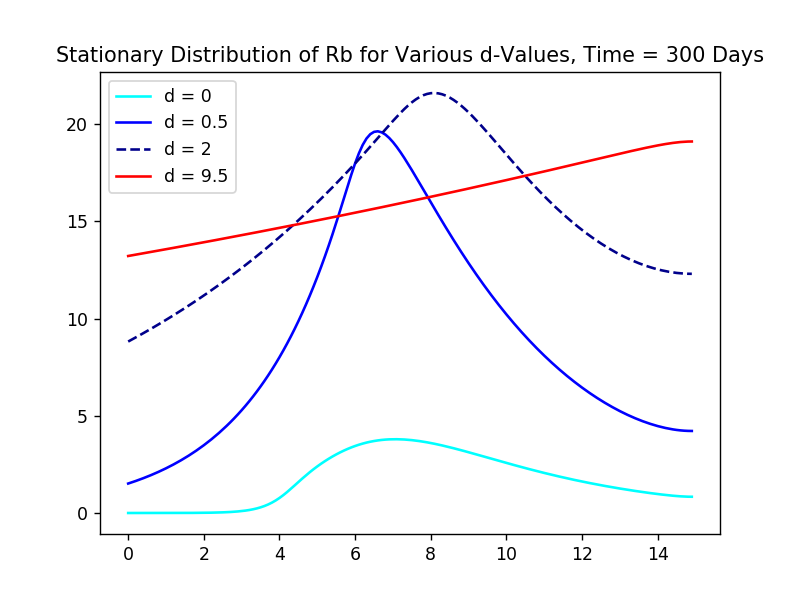

C:\Users\aliso\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  if __name__ == '__main__':


Text(0.5, 1.0, 'Stationary Distribution of Rb for Various d-Values, Time = 300 Days')

In [56]:
first = 0
second =0.5
third = 2
fourth = 9.5
plt.plot(z_grid,stationary_Rb[:,int(first/dstep)],color='aqua')
plt.plot(z_grid,stationary_Rb[:,int(second/dstep)],color='blue')
plt.plot(z_grid,stationary_Rb[:,int(third/dstep)],color='darkblue',linestyle='--')
plt.plot(z_grid,stationary_Rb[:,int(fourth/dstep)],color='red')
plt.legend('best',labels=('d = {}'.format(first),'d = {}'.format(second),'d = {}'.format(third),'d = {}'.format(fourth)))
plt.title('Stationary Distribution of Rb for Various d-Values, Time = {} Days'.format(tmax))


<IPython.core.display.Javascript object>


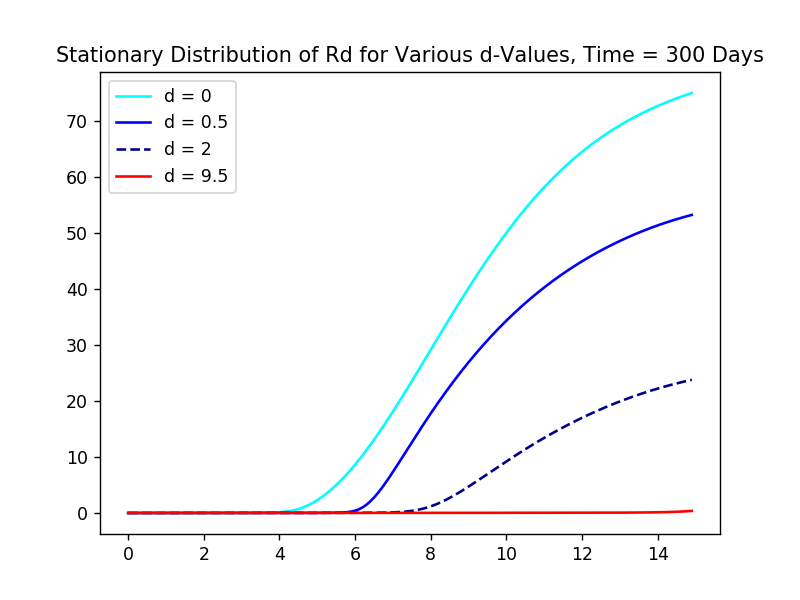

C:\Users\aliso\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  if __name__ == '__main__':


Text(0.5, 1.0, 'Stationary Distribution of Rd for Various d-Values, Time = 300 Days')

In [61]:
first = 0
second =0.5
third = 2
fourth = 9.5
plt.plot(z_grid,stationary_Rd[:,int(first/dstep)],color='aqua')
plt.plot(z_grid,stationary_Rd[:,int(second/dstep)],color='blue')
plt.plot(z_grid,stationary_Rd[:,int(third/dstep)],color='darkblue',linestyle='--')
plt.plot(z_grid,stationary_Rd[:,int(fourth/dstep)],color='red')
plt.legend('best',labels=('d = {}'.format(first),'d = {}'.format(second),'d = {}'.format(third),'d = {}'.format(fourth)))
plt.title('Stationary Distribution of Rd for Various d-Values, Time = {} Days'.format(tmax))


In [60]:
from my_equations import get_R
stationary_R = get_R(stationary_Rd,stationary_Rb)

<IPython.core.display.Javascript object>


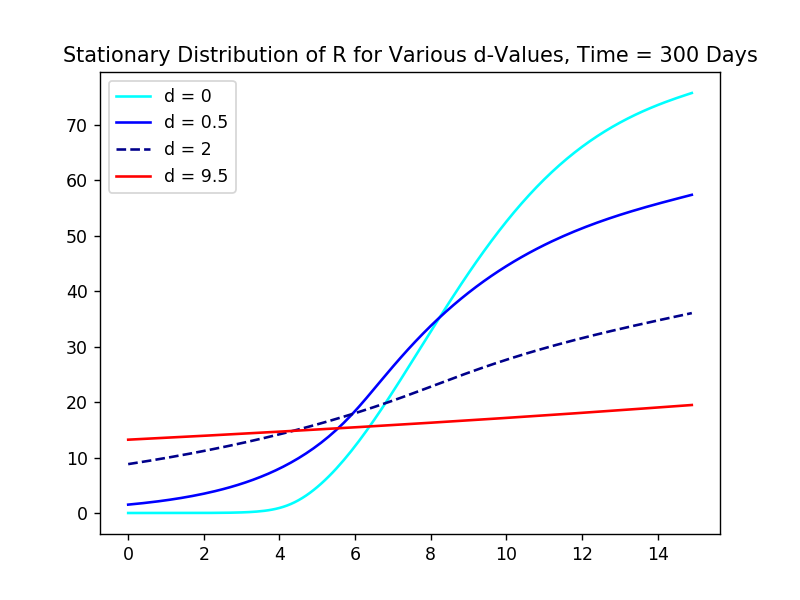

C:\Users\aliso\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  if __name__ == '__main__':


Text(0.5, 1.0, 'Stationary Distribution of R for Various d-Values, Time = 300 Days')

In [62]:
first = 0
second =0.5
third = 2
fourth = 9.5
plt.plot(z_grid,stationary_R[:,int(first/dstep)],color='aqua')
plt.plot(z_grid,stationary_R[:,int(second/dstep)],color='blue')
plt.plot(z_grid,stationary_R[:,int(third/dstep)],color='darkblue',linestyle='--')
plt.plot(z_grid,stationary_R[:,int(fourth/dstep)],color='red')
plt.legend('best',labels=('d = {}'.format(first),'d = {}'.format(second),'d = {}'.format(third),'d = {}'.format(fourth)))
plt.title('Stationary Distribution of R for Various d-Values, Time = {} Days'.format(tmax))


In [64]:
import pandas as pd
# save everything to results dataframes to save repeating
pd.DataFrame(stationary_A).to_csv("A_dz.csv")
pd.DataFrame(stationary_Rb).to_csv("Rb_dz.csv")
pd.DataFrame(stationary_Rd).to_csv("Rd_dz.csv")
pd.DataFrame(stationary_Rs).to_csv("Rs_dz.csv")

<IPython.core.display.Javascript object>


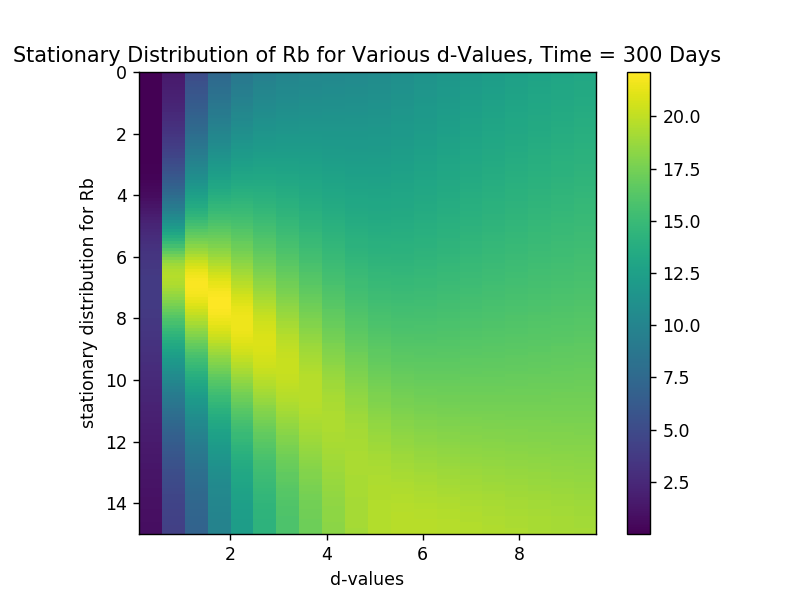

In [66]:
# Heatmap
plt.imshow(stationary_Rb[:,:],aspect=d/zmax,origin="lower",extent=(dmin,d,0,zmax))
plt.xlabel('d-values')
plt.ylabel('stationary distribution for Rb')
plt.title('Stationary Distribution of Rb for Various d-Values, Time = {} Days'.format(tmax))
plt.gca().invert_yaxis()
plt.colorbar()

<IPython.core.display.Javascript object>


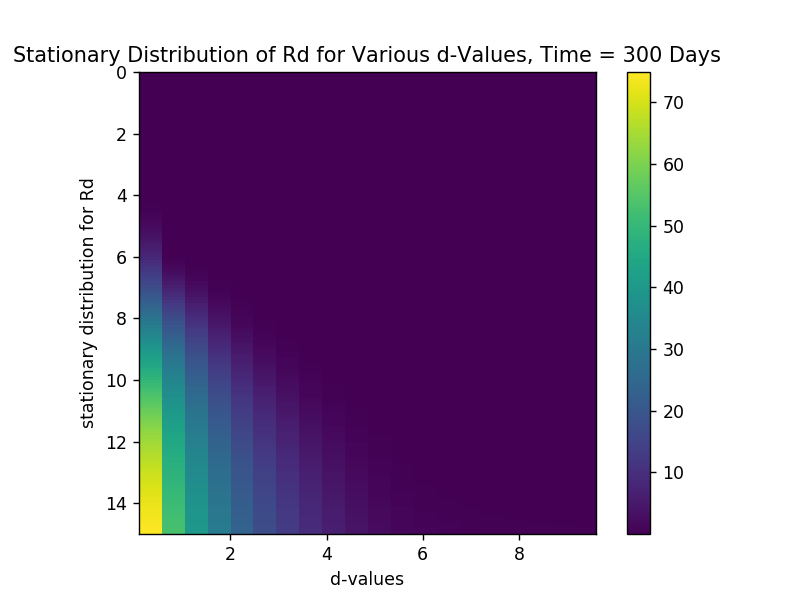

In [67]:
# Heatmap
plt.imshow(stationary_Rd[:,:],aspect=d/zmax,origin="lower",extent=(dmin,d,0,zmax))
plt.xlabel('d-values')
plt.ylabel('stationary distribution for Rd')
plt.title('Stationary Distribution of Rd for Various d-Values, Time = {} Days'.format(tmax))
plt.gca().invert_yaxis()
plt.colorbar()

<IPython.core.display.Javascript object>


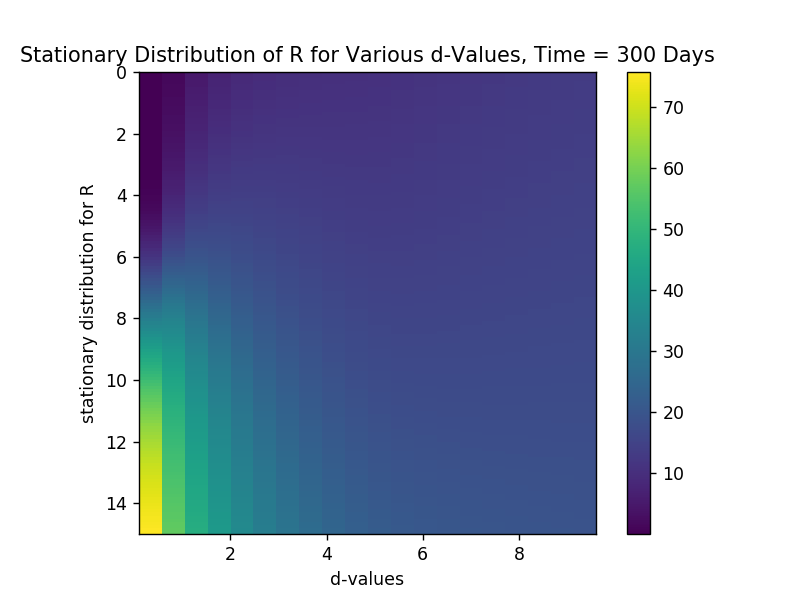

In [69]:
# Heatmap
plt.imshow(stationary_R[:,:],aspect=d/zmax,origin="lower",extent=(dmin,d,0,zmax))
plt.xlabel('d-values')
plt.ylabel('stationary distribution for R')
plt.title('Stationary Distribution of R for Various d-Values, Time = {} Days'.format(tmax))
plt.gca().invert_yaxis()
plt.colorbar()

In [81]:
R = get_R(stationary_Rd,stationary_Rb) #+ stationary_Rs

In [ ]:
# Import Datafr

In [83]:
stationary_Rs

array([ 11.02926868,  52.71769863,  88.385192  , 123.55182251,
       153.7772818 , 178.68051439, 198.9927379 , 215.51109593,
       228.76164565, 238.78476736, 245.02031346, 247.31369502,
       247.17311507, 246.11275586, 244.79692758, 243.4607299 ,
       242.1856433 , 240.99762639, 239.90141629, 238.8934704 ])

In [85]:
pd.DataFrame(R).sum(axis=0) + stationary_Rs

0     4737.567144
1     4353.619904
2     4029.322769
3     3710.927636
4     3437.213490
5     3211.571406
6     3027.422583
7     2877.566060
8     2757.217972
9     2665.961078
10    2608.875419
11    2587.550922
12    2588.464990
13    2597.868706
14    2609.683132
15    2621.738557
16    2633.273784
17    2644.040257
18    2653.987064
19    2663.141390
dtype: float64

In [ ]:
#